In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sgUmJcKajnsJigJKvbhR")
project = rf.workspace("machine-learning-4mojt").project("fish-detection-frgxn")
version = project.version(1)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fish-detection-1 in yolov11:: 100%|██████████| 1184/1184 [00:00<00:00, 9017.45it/s]


In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.64 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6096.0/8062.4 GB disk)


In [3]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [4]:
print(dataset.location)


/kaggle/working/Fish-detection-1


In [5]:
!yolo task=detect mode=train model=yolo11s.pt data=/kaggle/working/Fish-detection-1/data.yaml epochs=60 imgsz=640 plots=True


100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 219MB/s]
Ultralytics 8.3.64 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/Fish-detection-1/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

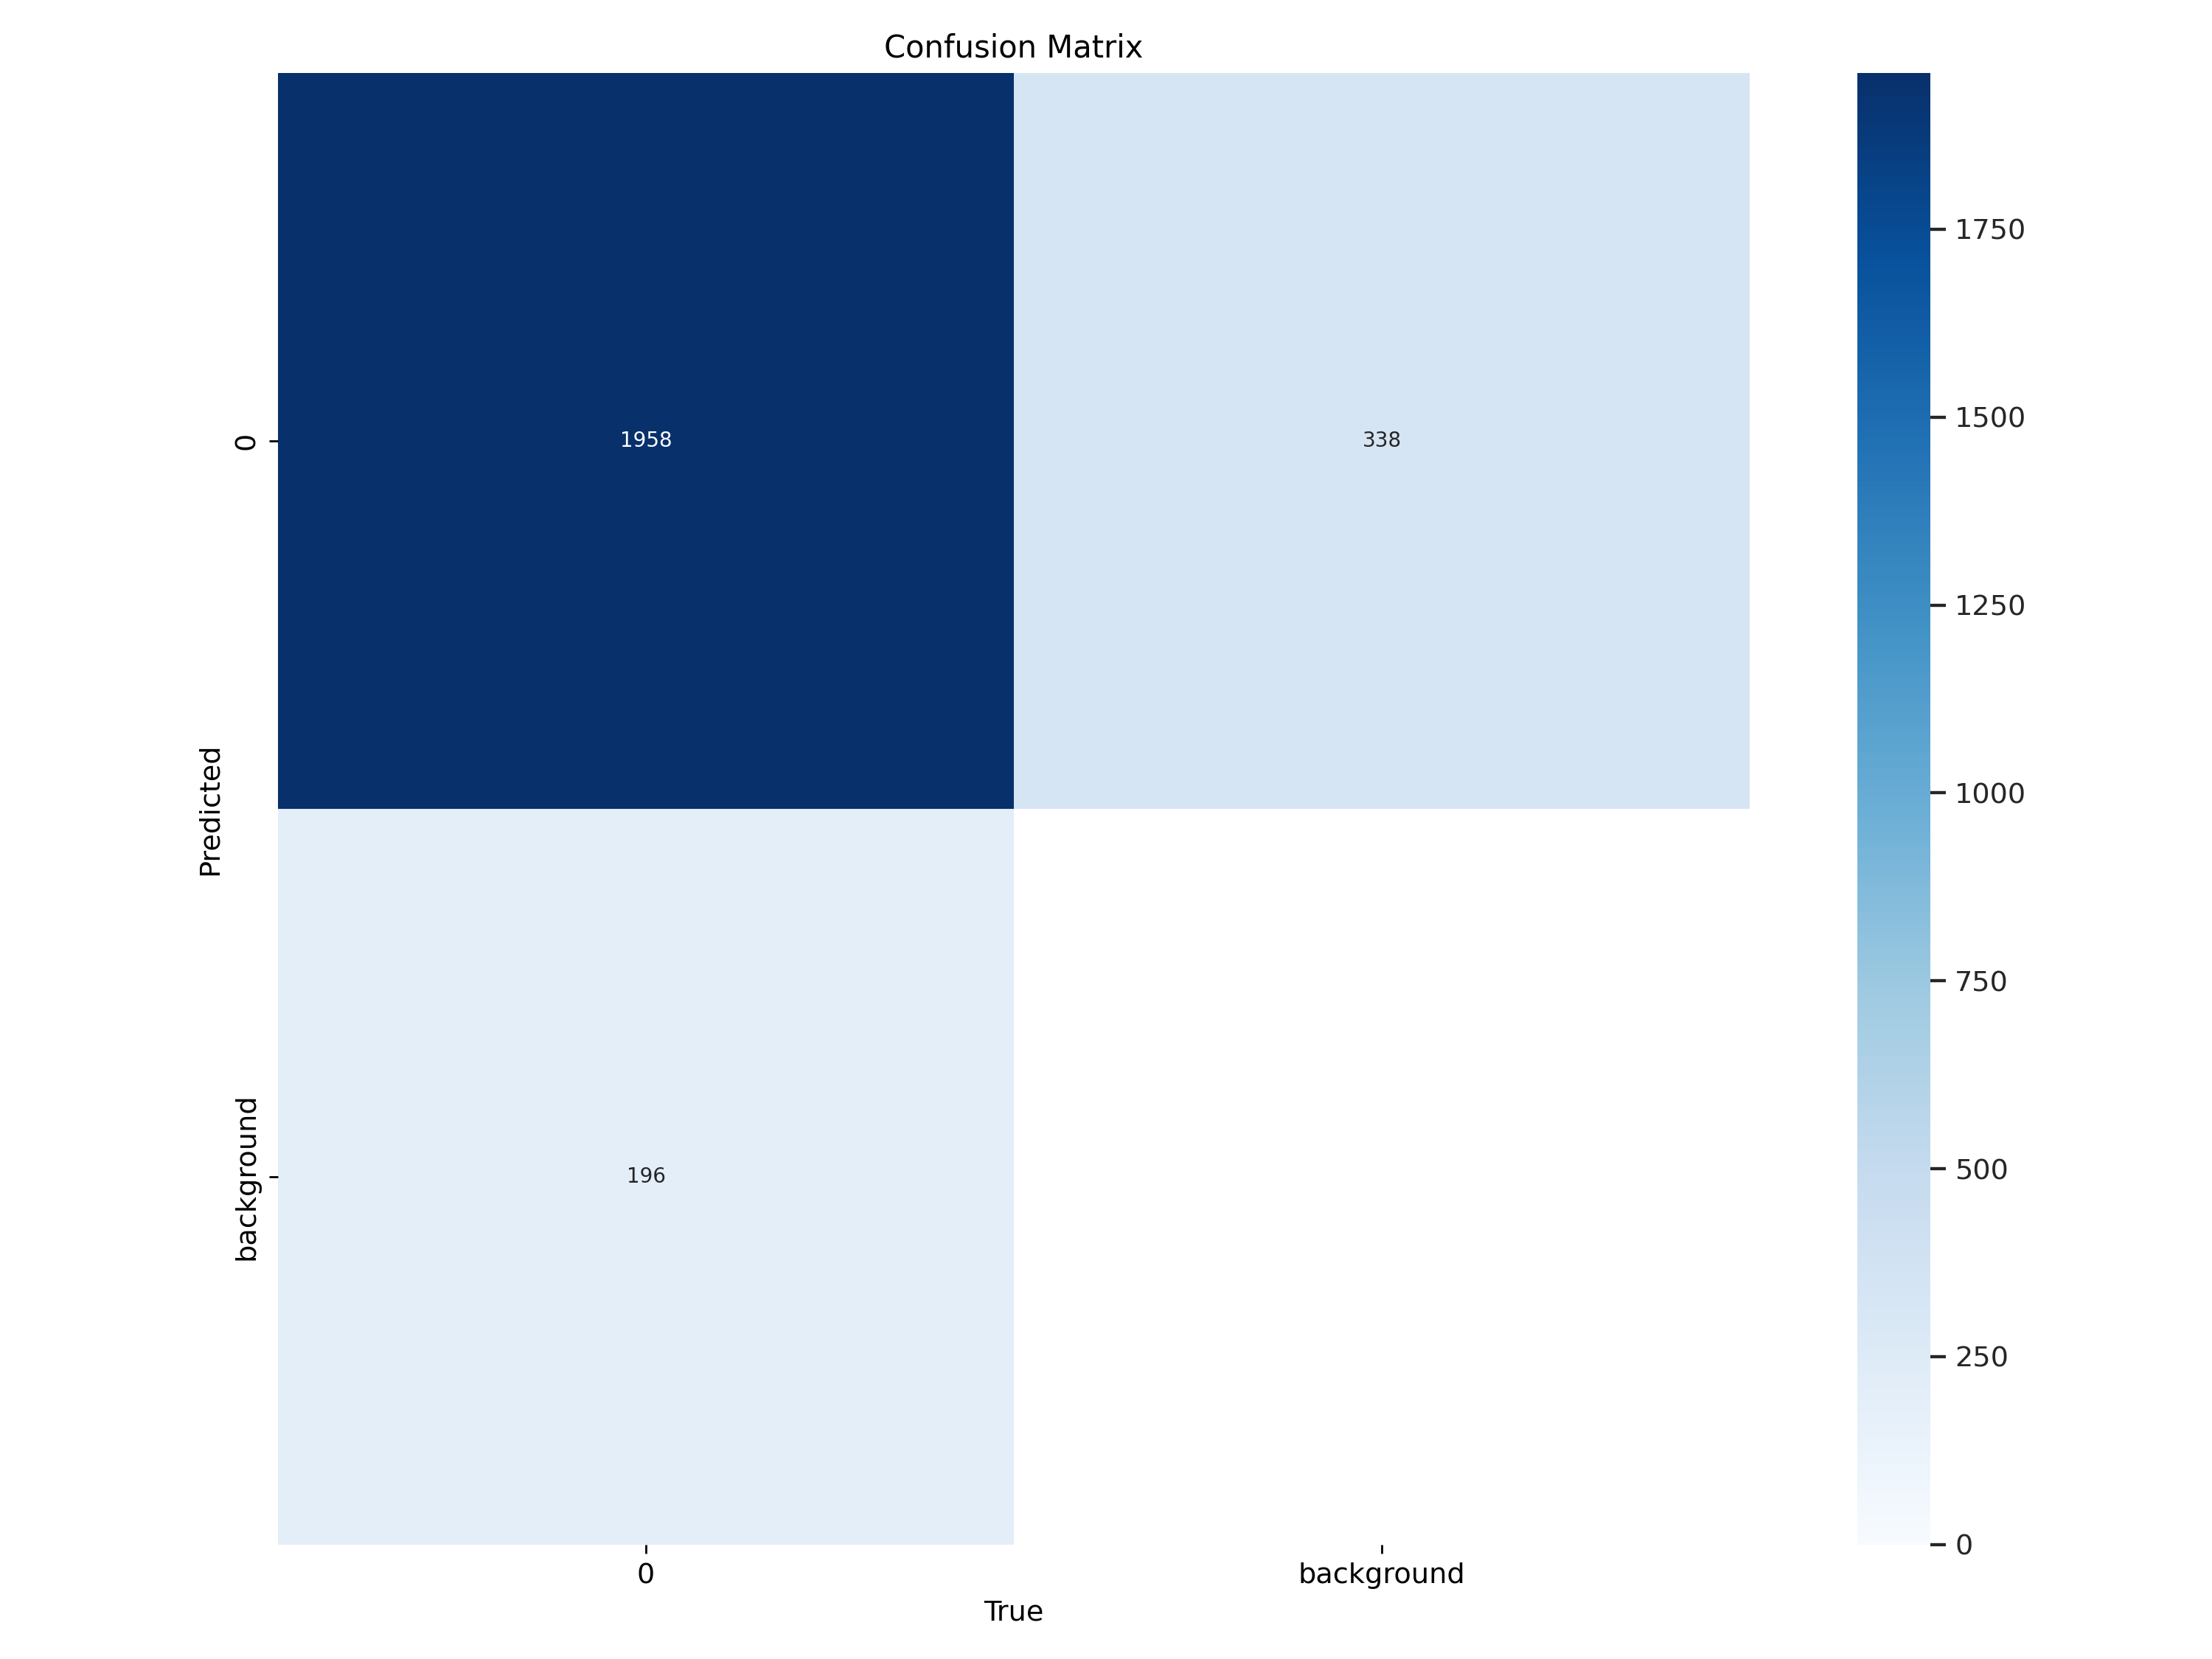

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

In [7]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/Fish-detection-1/test/images save=True

Ultralytics 8.3.64 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/59 /kaggle/working/Fish-detection-1/test/images/frame1008_jpg.rf.407f49a98000ae307dc9128b74505a0f.jpg: 640x640 25 0s, 11.5ms
image 2/59 /kaggle/working/Fish-detection-1/test/images/frame1126_jpg.rf.03405d7a7278f6af6df43f50a6842faa.jpg: 640x640 17 0s, 9.8ms
image 3/59 /kaggle/working/Fish-detection-1/test/images/frame1133_jpg.rf.4e2f1e2d20ac216ec85623465c37398e.jpg: 640x640 25 0s, 9.1ms
image 4/59 /kaggle/working/Fish-detection-1/test/images/frame1188_jpg.rf.8148dec1b1a81c2eadf6a09ff4d7218a.jpg: 640x640 20 0s, 9.0ms
image 5/59 /kaggle/working/Fish-detection-1/test/images/frame1239_jpg.rf.cdceaad471c518ea1d658ceafec273b4.jpg: 640x640 17 0s, 9.0ms
image 6/59 /kaggle/working/Fish-detection-1/test/images/frame1241_jpg.rf.c0b91a518cb0354d2ba0f15dbe4efa5f.jpg: 640x640 18 0s, 9.1ms
image 7/59 /kaggle/working/F

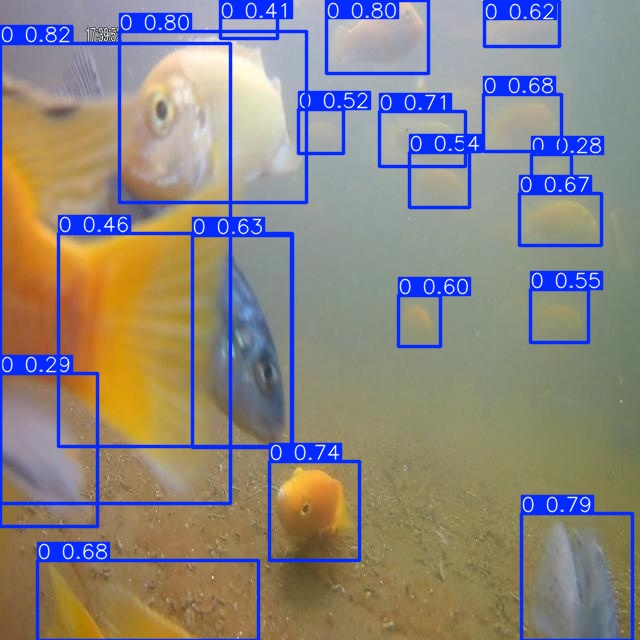

In [8]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:1]:
	display(IPyImage(filename=img, width=600))
	print("\n")

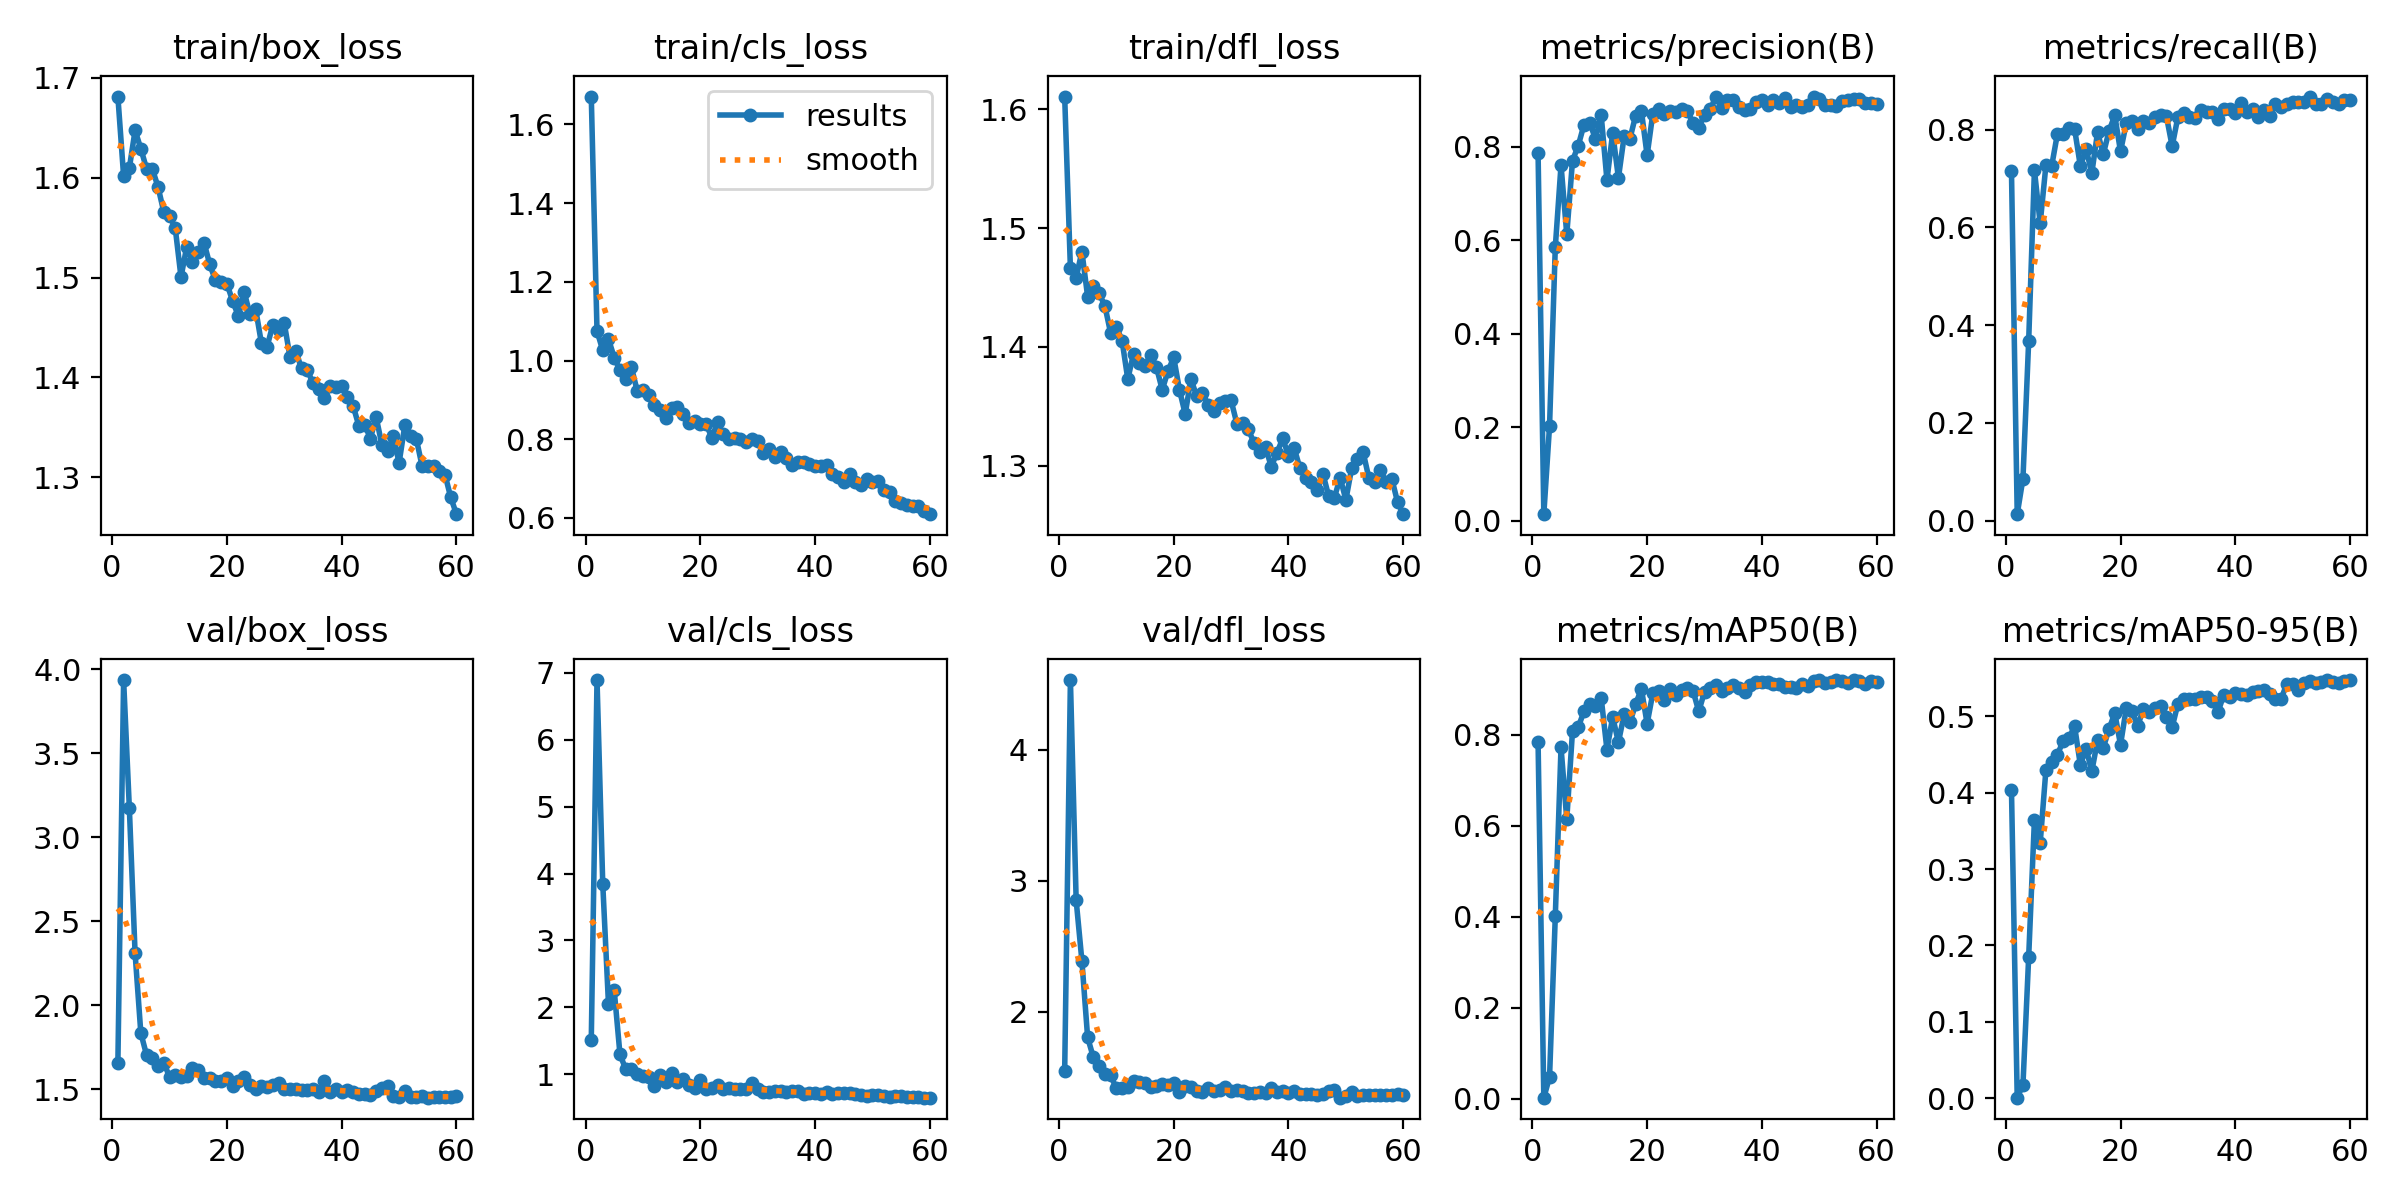

In [9]:
from IPython.display import Image as IPyImage

# Display training loss curves (accuracy, loss, and other metrics during training)
loss_curve_path = '/kaggle/working/runs/detect/train/results.png'
IPyImage(filename=loss_curve_path, width=600)


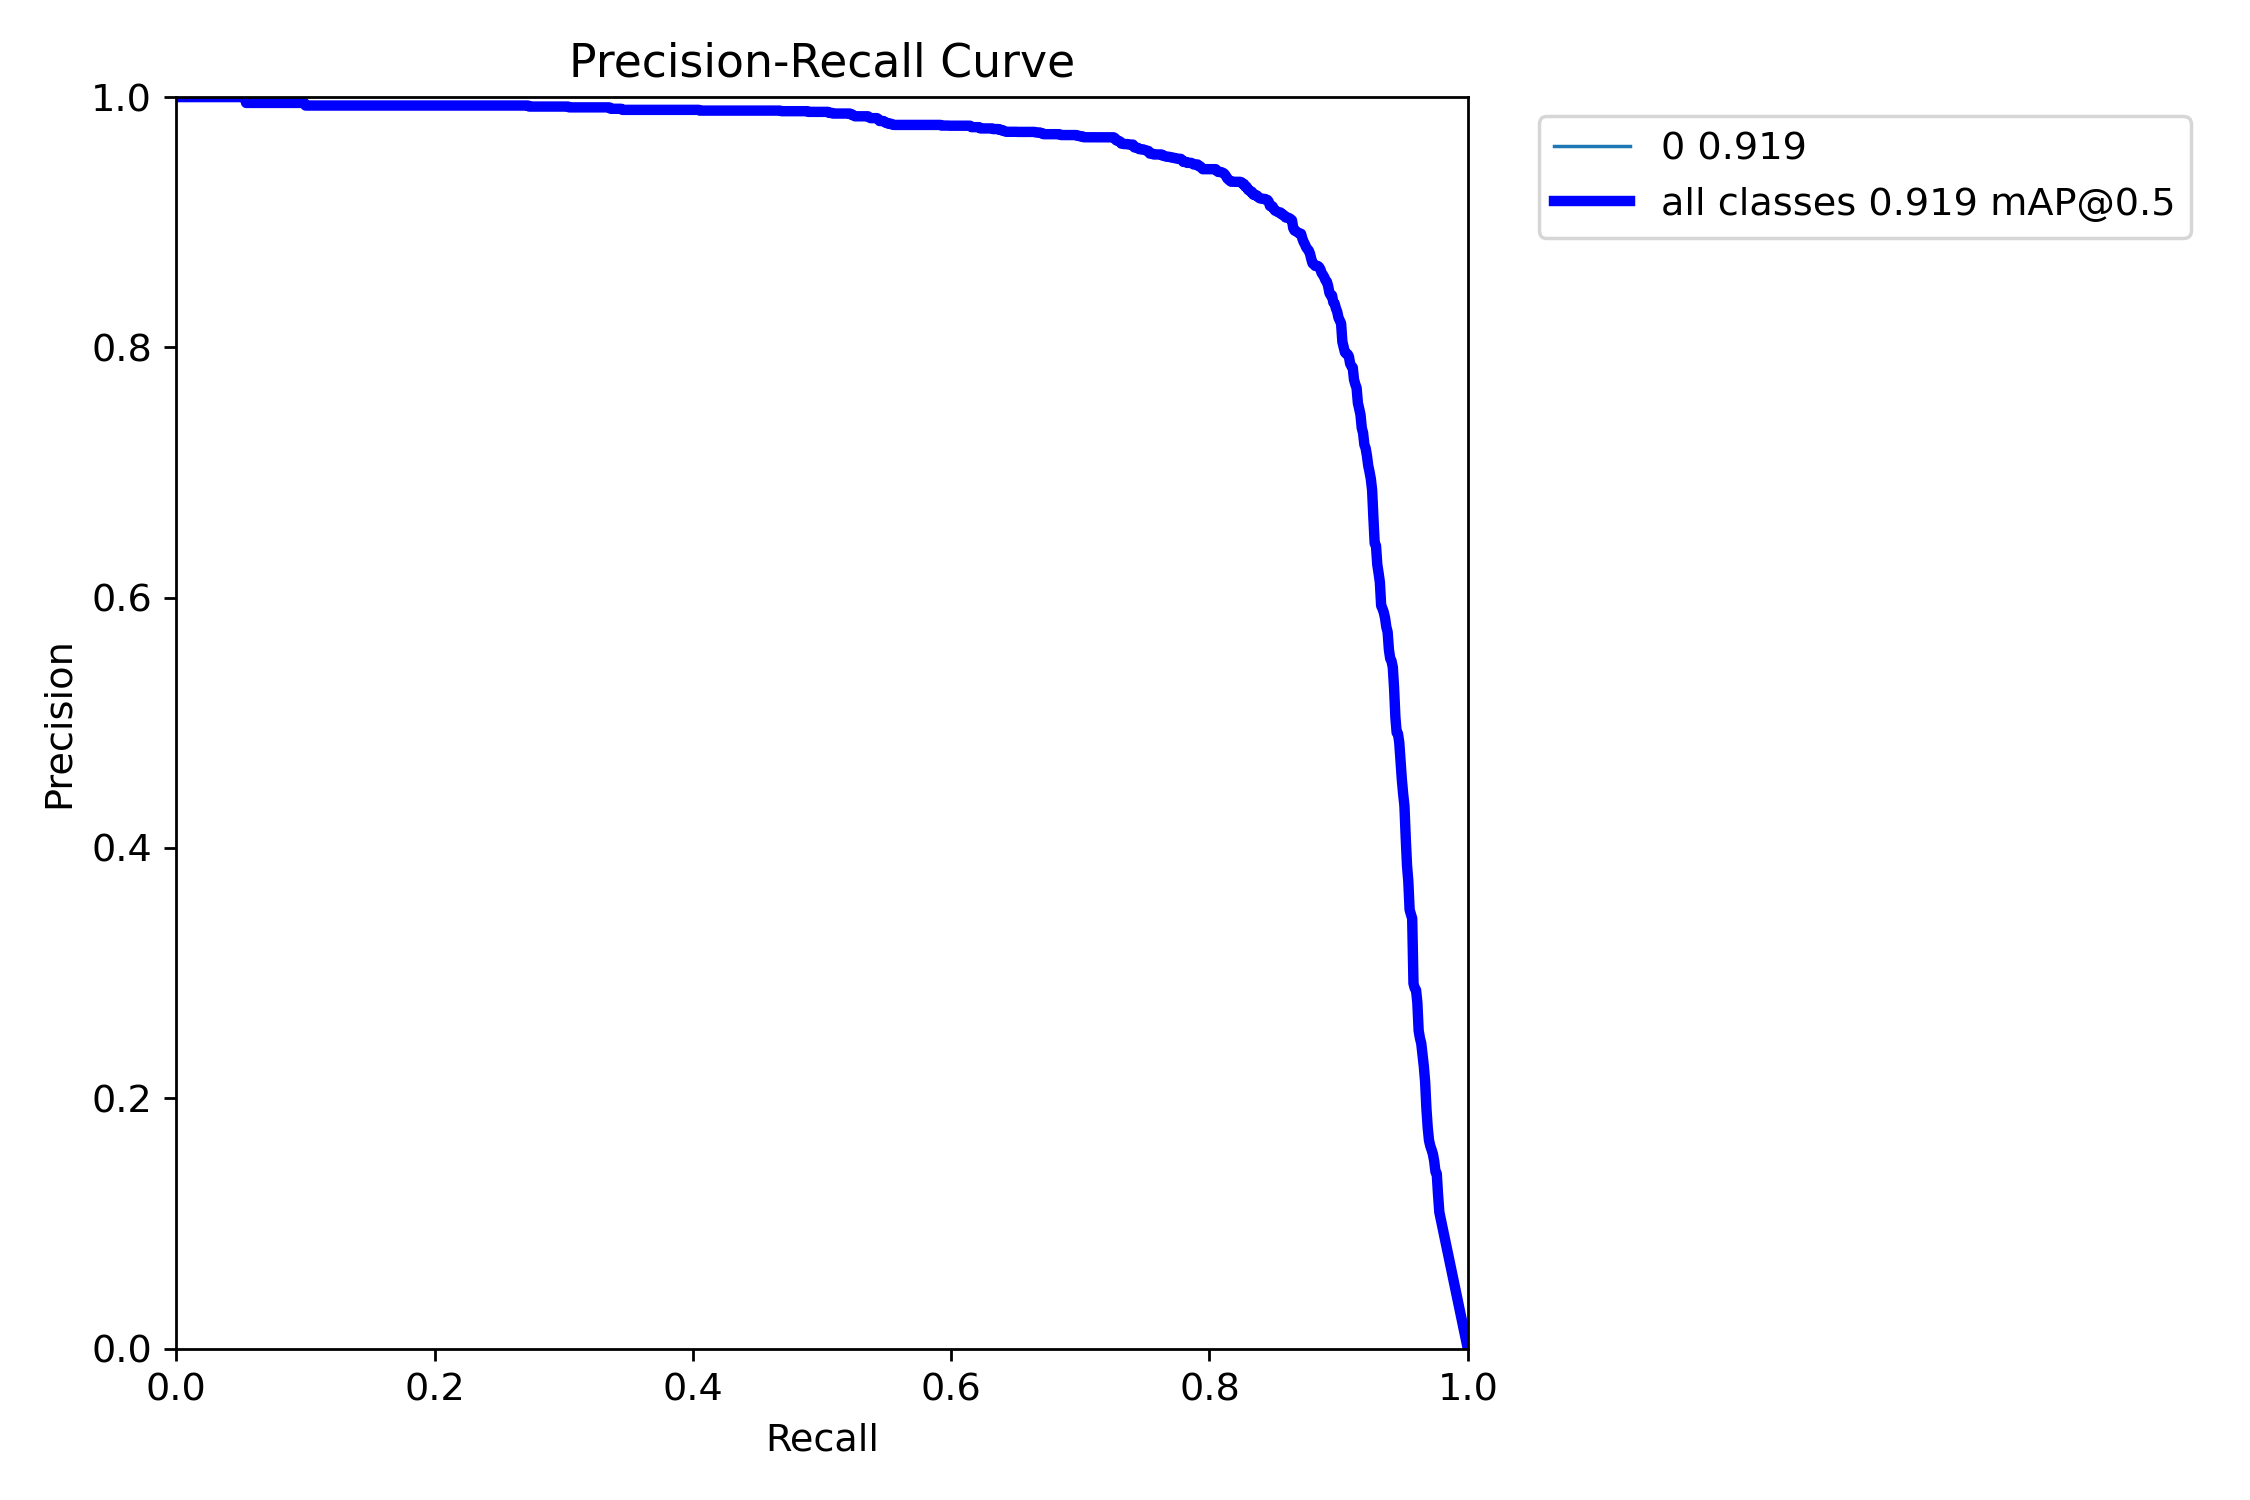

In [10]:
try:
    pr_curve_path = os.path.join("/kaggle/working/runs/detect/train/PR_curve.png")
    display(IPyImage(filename=pr_curve_path, width=800))
except FileNotFoundError:
    print(f"Precision-Recall curve image not found at: {pr_curve_path}")



In [25]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 82 (delta 9), reused 14 (delta 5), pack-reused 57 (from 1)
Receiving objects: 100% (82/82), 29.78 MiB | 35.41 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [26]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [27]:
!ls

Fish-detection-1  runs	yolo11n.pt  yolo11s.pt	YOLO-V8-CAM


In [28]:
%cd /kaggle/working/YOLO-V8-CAM

/kaggle/working/YOLO-V8-CAM


In [29]:
!ls

 images        models	   yolo_cam
 LICENSE.txt   README.md  'YOLO v8n EigenCAM.ipynb'


In [30]:
!pip install ttach

In [31]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [32]:
dataset.location

'/kaggle/working/Fish-detection-1'

In [33]:
img = cv2.imread('/kaggle/working/Fish-detection-1/test/images/frame1008_jpg.rf.407f49a98000ae307dc9128b74505a0f.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [34]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolo11n.pt')
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [35]:
target_layers =[model.model.model[-2]]

In [36]:
cam = EigenCAM(model, target_layers,task='od')


0: 640x640 1 bird, 1 banana, 1 apple, 204.9ms
Speed: 5.9ms preprocess, 204.9ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 640)


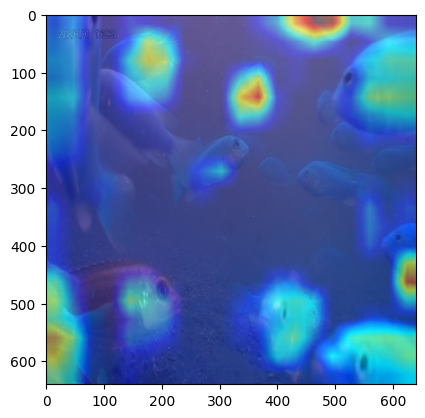

In [37]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [39]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 640x640 1 bird, 1 banana, 1 apple, 139.1ms
Speed: 3.2ms preprocess, 139.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


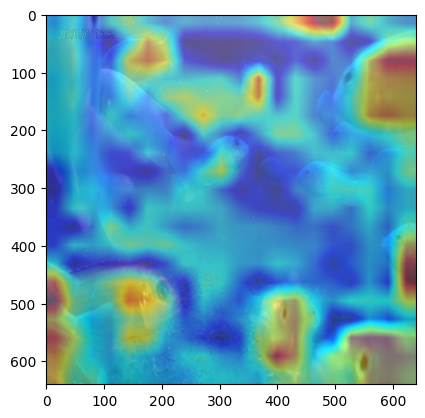

In [40]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

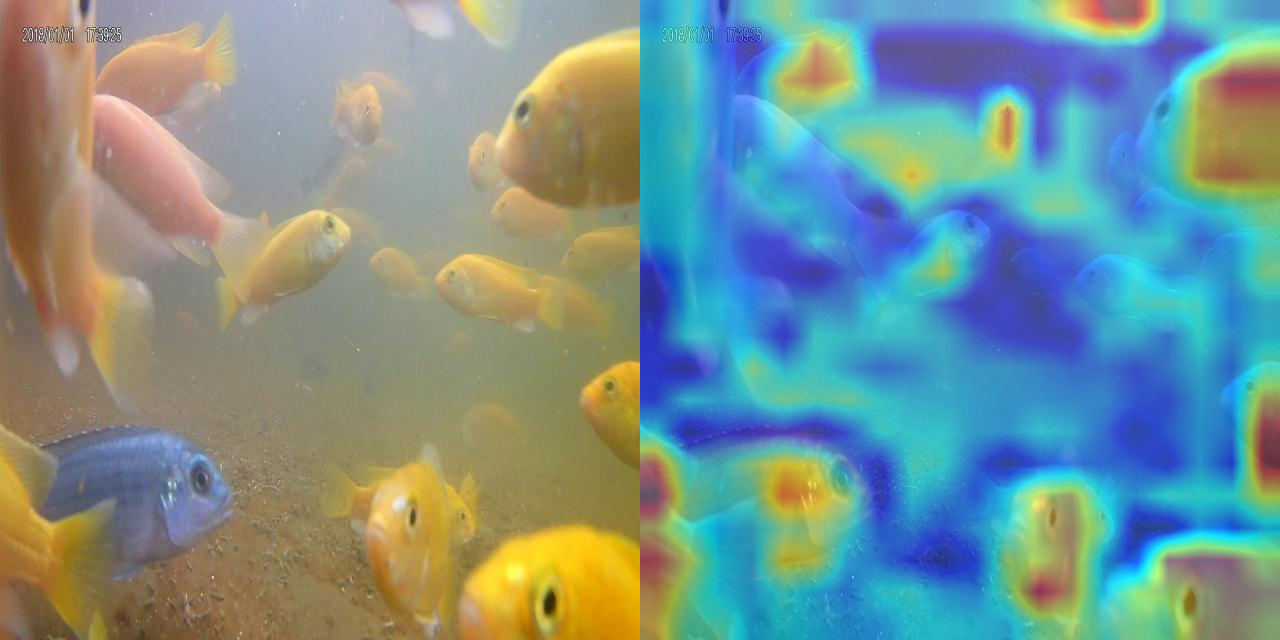

In [41]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))